In [2]:
# Install the ultralytics package which contains YOLOv8
!pip install ultralytics

# Import the necessary libraries
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Only needed if using Colab
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv8 model
# You can choose different sizes: n (nano), s (small), m (medium), l (large), x (extra large)
model = YOLO('yolov8n.pt')  # Load the nano model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 23.1 MB/s eta 0:00:0000:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 133MB/s]


In [5]:
# Define dataset paths
train_dir = "/kaggle/input/license-plate-dataset/archive/images/train"
val_dir = "/kaggle/input/license-plate-dataset/archive/images/val"

# Define class names
classes = ["license_plate"]  # Add more classes if needed

# Create YAML content
data_yaml_content = f"""
train: {train_dir}
val: {val_dir}

nc: {len(classes)}
names: {str(classes).replace("'", '"')}
"""

# Save to a file
yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

# Display the content for verification
print("Contents of data.yaml:")
!cat {yaml_path}

Contents of data.yaml:

train: /kaggle/input/license-plate-dataset/archive/images/train
val: /kaggle/input/license-plate-dataset/archive/images/val

nc: 1
names: ["license_plate"]


In [6]:
results = model.train(
    data="/kaggle/working/data.yaml",
    epochs=40,  
    imgsz=640, 
    lr0= 0.0005,  
    batch=32,
    lrf=0.1,
    augment=True
)

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/license-plate-dataset/archive/labels/train... 1525 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1526/1526 [00:09<00:00, 160.51it/s]

train: WARNING ⚠️ /kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg'


train: WARNING ⚠️ Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/license-plate-dataset/archive/labels/val... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:01<00:00, 130.30it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.84G      1.033      2.126      1.059         39        640: 100%|██████████| 48/48 [00:16<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all        169        169      0.312       0.58      0.508      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      4.64G     0.9319      1.107     0.9768         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        169        169      0.811      0.905      0.899      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.64G     0.9132     0.9121       0.98         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        169        169      0.957      0.799      0.916      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      4.64G     0.7709     0.5204     0.9371         40        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        169        169      0.971      0.992      0.994       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      4.64G     0.7776     0.5122     0.9358         36        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        169        169      0.958      0.734      0.832      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.64G     0.7715     0.5048     0.9321         45        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        169        169      0.988      0.953      0.988      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      4.64G     0.7659      0.494     0.9312         48        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        169        169      0.978      0.982       0.99      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.64G      0.725     0.4604     0.9139         46        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        169        169      0.972      0.982      0.993      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      4.64G     0.7371     0.4725      0.924         42        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        169        169      0.965      0.979      0.986      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      4.64G     0.7133     0.4599     0.9091         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        169        169      0.973       0.97      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.64G     0.7112     0.4485     0.9196         35        640: 100%|██████████| 48/48 [00:15<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        169        169      0.992      0.988      0.992      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      4.64G     0.7178     0.4522     0.9179         47        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all        169        169      0.959      0.994      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      4.64G      0.711     0.4433     0.9134         39        640: 100%|██████████| 48/48 [00:15<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        169        169      0.994      0.988      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      4.64G      0.694     0.4367     0.9062         34        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        169        169      0.992      0.988      0.992      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      4.64G     0.6866     0.4199     0.8962         42        640: 100%|██████████| 48/48 [00:15<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        169        169      0.987      0.988      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      4.64G     0.6372     0.3773     0.8853         40        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        169        169      0.977      0.991      0.991      0.848


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      4.64G     0.6032     0.3598     0.8676         21        640: 100%|██████████| 48/48 [00:16<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all        169        169      0.974      0.994      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      4.64G     0.6076     0.3482     0.8684         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        169        169      0.976          1      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      4.64G      0.598     0.3377     0.8621         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        169        169      0.992      0.994      0.994      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      4.64G     0.5944     0.3338     0.8652         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all        169        169      0.993      0.994      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      4.64G     0.5706     0.3221      0.854         21        640: 100%|██████████| 48/48 [00:14<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        169        169      0.994      0.993      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      4.64G     0.5791     0.3249     0.8558         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all        169        169      0.985      0.994      0.994      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      4.64G     0.5561      0.314     0.8485         21        640: 100%|██████████| 48/48 [00:14<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all        169        169      0.988      0.994      0.994      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      4.64G      0.565     0.3097     0.8514         20        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all        169        169      0.993      0.994      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      4.64G     0.5372     0.3053     0.8439         21        640: 100%|██████████| 48/48 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        169        169      0.994          1      0.993      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      4.64G     0.5368      0.296     0.8428         20        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        169        169      0.994          1      0.991       0.86



40 epochs completed in 0.184 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


                   all        169        169      0.982      0.988      0.994      0.872


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /kaggle/input/number-plate-detection/images/N57.jpeg: 416x640 1 license_plate, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/number-plate-detection/images/N58.jpeg: 448x640 1 license_plate, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/number-plate-detection/images/N120.jpeg: 416x640 1 license_plate, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/number-plate-detection/images/N36.jpeg: 416x640 1 license_plate, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/number-plate-detection/images/N158.jpeg: 640x480 1 license_plate, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /kaggle/input/number-plat

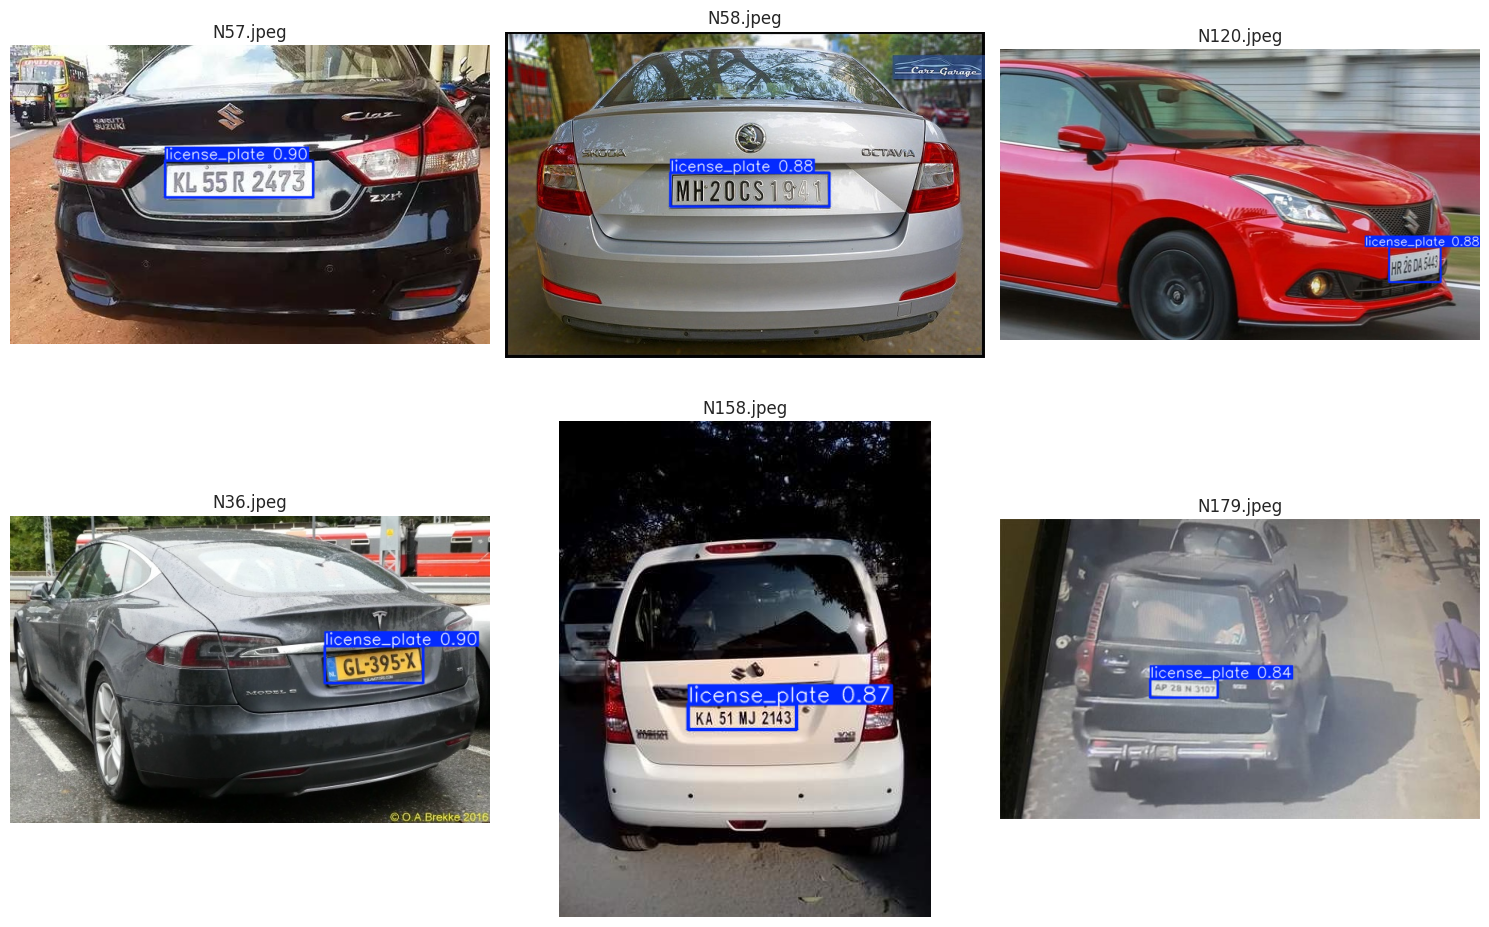

Processed images saved at:
/kaggle/working/processed_images/processed_0_N57.jpeg
/kaggle/working/processed_images/processed_1_N58.jpeg
/kaggle/working/processed_images/processed_2_N120.jpeg
/kaggle/working/processed_images/processed_3_N36.jpeg
/kaggle/working/processed_images/processed_4_N158.jpeg
/kaggle/working/processed_images/processed_5_N179.jpeg


In [15]:
import glob
import random
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

# Load your model
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")

# Get all JPEG images
all_images = glob.glob("/kaggle/input/number-plate-detection/images/*.jpeg")

# Select 6 random images
test_images = random.sample(all_images, min(6, len(all_images)))

# Create a 2x3 grid for displaying the images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create a directory to save the processed images
save_dir = "/kaggle/working/processed_images"
os.makedirs(save_dir, exist_ok=True)

# List to store processed image paths
processed_images = []

# Process each image
for i, (img_path, ax) in enumerate(zip(test_images, axes.flatten())):
    # Run inference
    results = model(img_path)
    
    # Get the annotated image
    result_img = results[0].plot()
    
    # Convert to RGB for matplotlib
    img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    
    # Save the processed image
    save_path = os.path.join(save_dir, f"processed_{i}_{os.path.basename(img_path)}")
    cv2.imwrite(save_path, result_img)
    processed_images.append(save_path)
    
    # Display the image
    ax.imshow(img_rgb)
    ax.axis("off")
    ax.set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

# Print the paths of the processed images
print("Processed images saved at:")
for img_path in processed_images:
    print(img_path)

In [ ]:
import cv2
import subprocess
from IPython.display import HTML
from base64 import b64encode
from ultralytics import YOLO
import os
from google.colab import files

# Initialize the YOLO model with the correct path
model_path = "/kaggle/working/runs/detect/train2/weights/best.pt"
print(f"Loading model from {model_path}...")
model = YOLO(model_path)

# Define input and output video paths
input_video = "/kaggle/input/car-number-plate-video/Automatic Number Plate Recognition (ANPR) _ Vehicle Number Plate Recognition (1).mp4"
output_video = "/kaggle/working/output_video.mp4""
compressed_video = "/kaggle/working/output_video_compressed.mp4"

# Check if files exist
if not os.path.exists(model_path):
    print(f"WARNING: Model file not found at {model_path}")

if not os.path.exists(input_video):
    print(f"WARNING: Video file not found at {input_video}")

# Open the input video file
cap = cv2.VideoCapture(input_video)
if not cap.isOpened():
    print(f"Error: Could not open video file {input_video}")
else:
    print(f"Video opened successfully: {input_video}")

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Video properties: {width}x{height}, {fps} FPS, {total_frames} frames")

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # Process video frame by frame
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Run YOLOv8 on the frame
        results = model(frame, verbose=False)

        # Draw bounding boxes
        for result in results:
            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0].item()
                label = f"Plate {conf:.2f}"

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Write frame to output video
        out.write(frame)
        frame_count += 1

        # Print progress every 100 frames
        if frame_count % 100 == 0:
            print(f"Processed {frame_count}/{total_frames} frames ({frame_count/total_frames*100:.1f}%)")

    # Release video resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"✅ Detection completed! Processed {frame_count} frames.")

    # Install FFmpeg if needed
    !apt-get update -qq && apt-get install -qq ffmpeg

    # Compress the video using FFmpeg
    print("⏳ Compressing video... (This may take a few seconds)")
    ffmpeg_command = [
        "ffmpeg", "-i", output_video, "-vcodec", "libx264", "-crf", "28",
        "-preset", "fast", compressed_video
    ]
    subprocess.run(ffmpeg_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print("✅ Compression done!")

    # Function to display video in Colab
    def play_video(file_path, width=800):
        """Display a video file directly in Colab."""
        try:
            with open(file_path, "rb") as video_file:
                video_data = video_file.read()
                video_base64 = b64encode(video_data).decode()
        except FileNotFoundError:
            return HTML("<p style='color:red;'>🚨 Error: Video file not found!</p>")

        video_html = f"""
        <video width="{width}" controls autoplay loop>
            <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        """

        return HTML(video_html)

    # Display the compressed video
    display(play_video(compressed_video, width=800))

    # Provide download link
    print("Download the output video:")
    files.download(compressed_video)